# Systèmes Linéaires Invariants dans le Temps, à temps discret
## Invariance dans le temps

Un système est invariant dans le temps (Time Invariant : TI), ssi :

$${\cal H}\{x[n]\} = y[n] \Leftrightarrow \forall n_o, {\cal H}\{x[n-n_o]\} = y[n-n_o]$$

Par exemple : $y[n] = {\cal H}\{x[n]\}= x[n-3] - x[n-7]$ est un système TI.  Le bout de code ci-dessous le montre.


In [69]:
import numpy as np
import matplotlib.pyplot as plt

def system(x):
    delai=7                               # Le délai est là uniquement parce qu'on ne peut pas avoir
                                          # d'indices négatifs en python
    out = x[delai-3::]-x[delai-7:-4:]
    return out

delai=7
x_original=np.random.sample((40,1))

for no in range(10):                     # On utilise en fait x[n+no], car on ne peut pas avoir d'indice négatif
    x=x_original[no::]
    sysout=system(x)
    y=system(x_original)
    y=y[no::]
    print('décalage : ',no,'différence entre sortie du système et y décalé : ',np.sum(np.abs(sysout-y)))





décalage :  0 différence entre sortie du système et y décalé :  0.0
décalage :  1 différence entre sortie du système et y décalé :  0.0
décalage :  2 différence entre sortie du système et y décalé :  0.0
décalage :  3 différence entre sortie du système et y décalé :  0.0
décalage :  4 différence entre sortie du système et y décalé :  0.0
décalage :  5 différence entre sortie du système et y décalé :  0.0
décalage :  6 différence entre sortie du système et y décalé :  0.0
décalage :  7 différence entre sortie du système et y décalé :  0.0
décalage :  8 différence entre sortie du système et y décalé :  0.0
décalage :  9 différence entre sortie du système et y décalé :  0.0


Dans la cellule ci-dessous, vérifiez que les systèmes:
  <li> ${\cal H}\{x[n]\} = x[4 n + 2]$
  <li> ${\cal H}\{x[n]\} = x[n] e^{\jmath 2 \pi n/10}$
ne sont pas invariants dans le temps

In [70]:
x_original=np.arange(40)
def system(x):
    out = x[::4] + x[2]               # Définition du système : H(x(n)) = x(4 n + 2 )
    return out

print('x : ',x_original.T)
for no in range(10):
    x=x_original[no::]
    sysout=system(x)
    y=system(x_original)
    y=y[no::] 
    print('no:', no, 'sys : ', sysout.T, 'y décalé : ',y.T)
    
# On voit que les deux sorties sont différentes


def system2(x):
    out= x[::]*np.exp(1j*0.2*np.pi*x[0])  # Définition du système : H(x(n)) = x( n  )exp(j 2 pi n /10)
    return out

print('x : ',x_original.T)
for no in range(10):
    x=x_original[no::]
    sysout=system2(x)
    y=system2(x_original)
    y=y[no::] 
    
    print('décalage : ',no,'différence entre sortie du système et y décalé : ',np.sum(np.abs(sysout-y)))
# On voit que les deux sorties sont différentes

    

x :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
no: 0 sys :  [ 2  6 10 14 18 22 26 30 34 38] y décalé :  [ 2  6 10 14 18 22 26 30 34 38]
no: 1 sys :  [ 4  8 12 16 20 24 28 32 36 40] y décalé :  [ 6 10 14 18 22 26 30 34 38]
no: 2 sys :  [ 6 10 14 18 22 26 30 34 38 42] y décalé :  [10 14 18 22 26 30 34 38]
no: 3 sys :  [ 8 12 16 20 24 28 32 36 40 44] y décalé :  [14 18 22 26 30 34 38]
no: 4 sys :  [10 14 18 22 26 30 34 38 42] y décalé :  [18 22 26 30 34 38]
no: 5 sys :  [12 16 20 24 28 32 36 40 44] y décalé :  [22 26 30 34 38]
no: 6 sys :  [14 18 22 26 30 34 38 42 46] y décalé :  [26 30 34 38]
no: 7 sys :  [16 20 24 28 32 36 40 44 48] y décalé :  [30 34 38]
no: 8 sys :  [18 22 26 30 34 38 42 46] y décalé :  [34 38]
no: 9 sys :  [20 24 28 32 36 40 44 48] y décalé :  [38]
x :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
décalage :  0

## Convolution, réponse impulsionnelle et équation aux différences à coefficients constants

Soit la {\em réponse impulsionnelle}, définie par 
$$ h[n] = {\cal H}\{\delta[n]\}$$

Sachant qu'on peut écrire tout signal discret par : 
$x[n] = \sum_k x[k] \delta[n-k]$

Par linéarité et invariance dans le temps :

$$y[n] = {\cal H}\{x[n]\} = \sum_k x[k] h[n-k]$$



En python, la convolution est définie dans la bibliothèque signal, comme indiqué ci-dessous :



Text(0.5, 1, '$y(n)=h(n)$')

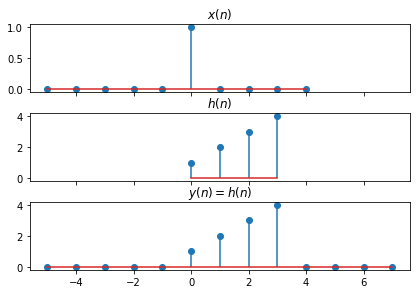

In [71]:
from scipy import signal
x=np.zeros(10)
x[5]=1
h=np.arange(1,5)
y=signal.convolve(x,h)
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
fig.tight_layout()

ax_orig.stem(np.arange(-5,5),x, use_line_collection=True)
ax_orig.set_title('$x(n)$')
ax_win.stem(h, use_line_collection=True)
ax_win.set_title('$h(n)$')
ax_filt.stem(np.arange(-5,8),y, use_line_collection=True)
ax_filt.set_title('$y(n)=h(n)$')


<li>Utilisez cette fonction pour effectuer un filtrage avec un signal $x[n]$ qui ne soit pas un impulsion (par exemple un signal de longueur 5.
 <li> Implémentez l'équation aux différences définie par :
     $$y[n] = {\cal H}\{x[n]\} = \sum_k x[k] h[n-k]$$
      et vérifiez que le résultat est identique à la convolution calculée précédemment

y par convolution python : [ 0.  3. 14. 26. 37. 33.  1. -4.]
y par implémentation directe : [ 0.  3. 14. 26. 37. 33.  1. -4.]
*on vérifie que les deux résultats sont identiques*


Text(0.5, 1, '$y(n)$ basé sur la convolution - itérations')

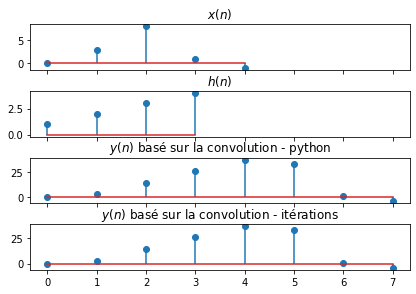

In [72]:
# Définition arbitraire de x

x_or=np.array([0.0 ,3.0 ,8.0, 1.0, -1.0])

# calcul de y par convolution "python"
y=signal.convolve(x_or,h)

# calcul de y par la formule directe de la convolution

x_or_c=y_c=np.zeros(x_or.size+h.size-1)  # initialiser la sortie à 0
h_c = np.zeros(x_or_c.size)
y_c = np.zeros(x_or_c.size)

# ajouts de zéros à la fin de x pour 
for k in range (0,x_or.size):
    x_or_c[k]=x_or[k]          # ne pas devoir jouer sur le test d'indices à la fin

for i in range (0, h.size):
    h_c[i]=h[i]

# appliquer l'expression de la convolution
for n in range(y_c.size):
    for k in range(n+1):
        y_c[n]=y_c[n]+(x_or_c[k])*(h_c[n-k]) 
         
print('y par convolution python :',y)
print('y par implémentation directe :',y_c)
print('*on vérifie que les deux résultats sont identiques*')

fig, (ax_orig, ax_win, ax_filt, ax_conv) = plt.subplots(4, 1, sharex=True)
fig.tight_layout()

ax_orig.stem(np.arange(5),x_or, use_line_collection=True)
ax_orig.set_title('$x(n)$')
ax_win.stem(h, use_line_collection=True)
ax_win.set_title('$h(n)$')
ax_filt.stem(np.arange(y.size),y, use_line_collection=True)
ax_filt.set_title('$y(n)$ basé sur la convolution - python')
ax_conv.stem(np.arange(y_c.size),y_c, use_line_collection=True)
ax_conv.set_title('$y(n)$ basé sur la convolution - itérations')

### Filtre récursif : implémentation par l'équation aux différences

Un filtre récursif peut être décrit par son équation aux différences :

$$ a_o y[n] =  \sum_{k=0}^{M} b_k x[n-k] - \sum_{k=1}^{N} a_k y[n-k] $$

Ce filtre récursif peut être implémenté, en python, avec la fonction scipy.signal.lfilter, par exemple, dans le cas de l'intégrateur à fuite :

$$ y[n] = \lambda y[n-1] + (1-\lambda)x[n]$$

donc, $a_o=1, a_1 = -\lambda, b_o = (1-\lambda)$


**Complétez la cellule ci-dessous pour vérifier que l'équation aux différences donne le même résultat que la fonction lfilter.**

*Dans un premier temps, il y aura une différence - vérifiez l'impact de la condition initiale (zi = [lamda])*

[1.         0.9        0.81       0.729      0.6561     0.59049
 0.531441   0.4782969  0.43046721 0.38742049 0.34867844 0.3138106
 0.28242954 0.25418658 0.22876792 0.20589113 0.18530202 0.16677182
 0.15009464 0.13508517]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1]


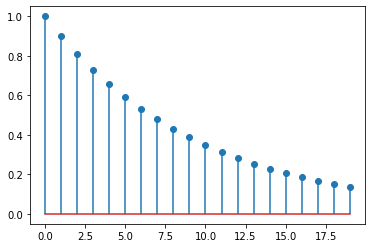

In [73]:

lamda=0.9
a=np.array([1,-lamda])
b=np.array([1-lamda])

xn=np.zeros(20)
xn[0]=1

z, _ = signal.lfilter(b, a, xn,zi=[lamda])

plt.stem(z, use_line_collection=True)

print(z)


y=np.zeros(z.size)

for i in range (z.size):
    y[i]= lamda*y[i-1] + (1-lamda)*xn[i]      # Définition de l`equation : y[n] = lamda*y[n-1] + (1-lamda)*x[n]

print(y/z)


### Constatations
On remarque que les deux sorties sont égales à une constante multiplicative près.  Après relecture attentive de la documentation concernant *lfilter*, on fixe *zi* à 0.  Le résultat est correct.



Text(0.5, 1.0, "$y(n)$ basé sur l'équation aux différences ")

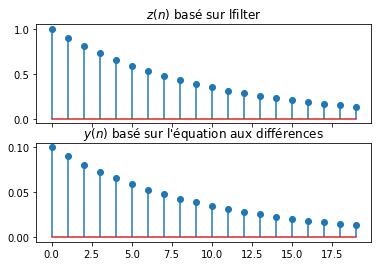

In [74]:
z, _ = signal.lfilter(b, a, xn,zi=[lamda])
fig, (ax_orig, ax_conv) = plt.subplots(2, 1, sharex=True)

ax_orig.stem(z, use_line_collection=True)
ax_orig.set_title('$z(n)$ basé sur lfilter')
ax_conv.stem(y, use_line_collection=True)
ax_conv.set_title('$y(n)$ basé sur l\'équation aux différences ')

#  Réponse fréquentielle

Dans cette partie du devoir, vous allez tracer les réponses fréquentielles du filtre présenté dans les transparents, et vérifiez que le résultat du filtrage est cohérent (en fréquence).  Vous allez donc reproduire les figures des transparents 174, à 178.

Ci dessous, vous trouverez la génération du signal bruité ainsi que sa représentation fréquentielle.  A titre d'exemple, vous trouverez également la représentation fréquentielle du filtre MA et de l'intégrateur à fuite..

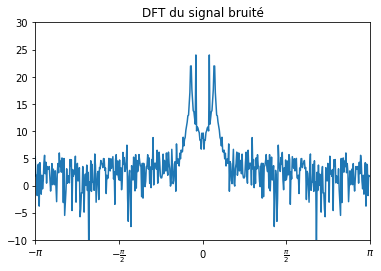

In [75]:
N=500
f1=0.020
f2=0.035
t=np.arange(N)
x=np.sin(2*np.pi*f1*t)+ np.sin(2*np.pi*f2*t)
y=x+np.random.normal(0,0.1,N)            #definition du signal generee


yf=np.fft.fftshift(np.fft.fft(y))          
plt.plot(10*np.log10(abs(yf)))
plt.axis([0,N,-10,30])                  #definition de la fenetre du graph
plt.xticks(np.arange(-0,N+1,N/4),[r'$-\pi$', r'$-\frac{\pi}{2}$','$0$',r'$\frac{\pi}{2}$',r'$\pi$'])

plt.title('DFT du signal bruité')
plt.show()

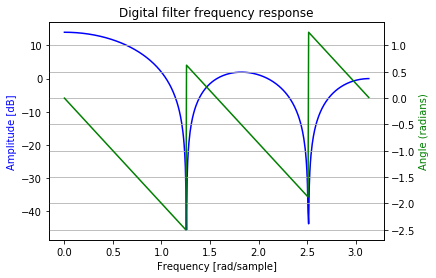

In [76]:
# Filtre MA de longueur 5

w, h = signal.freqz(np.ones(5))
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')

ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()
plt.show()

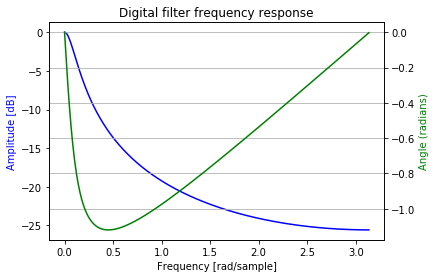

In [77]:
# Intégrateur à fuite
lamda=0.9
a=np.array([1,-lamda])
b=np.array([1-lamda])
w, h = signal.freqz(b,a)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()
plt.show()

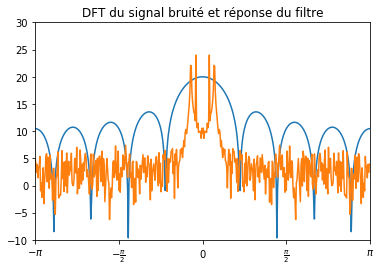

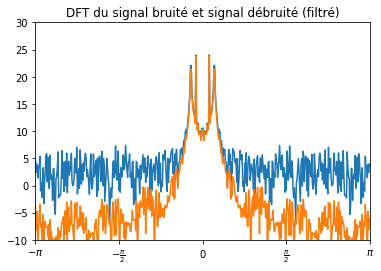

In [280]:
M=9                # pour reproduire les figures des transparents 175 e 176

#filtre MA
MA=np.zeros(N)
MA[:M]=1/M


#generation du signal
N=500
f1=0.020
f2=0.035
t=np.arange(N)
x=np.sin(2*np.pi*f1*t)+ np.sin(2*np.pi*f2*t)
y=x+np.random.normal(0,0.1,N)

#passe le domaine frequentiel 
yf=np.fft.fftshift(np.fft.fft(y))
y_ma=np.fft.fftshift(np.fft.fft(MA))


plt.title('DFT du signal bruité et réponse du filtre')
plt.plot(10*np.log10(abs(y_ma))+20)      # on ajoute 20 pour faire une decalage du graph vers en haute

plt.plot(10*np.log10(abs(yf)))
plt.axis([0,N,-10,30])                  #definition de la fenetre du graph
plt.xticks(np.arange(-0,N+1,N/4),[r'$-\pi$', r'$-\frac{\pi}{2}$','$0$',r'$\frac{\pi}{2}$',r'$\pi$'])
plt.show()


plt.title('DFT du signal bruité et signal débruité (filtré)')
g=(1/M)*np.ones(M)
gd=np.convolve(y, g, mode='same')   # The running mean is a case of the mathematical operation of convolution. 
                                    # For the running mean, you slide a window along the input 
                                    # and compute the mean of the window's contents. 
gf=np.fft.fftshift(np.fft.fft(gd))      #passe le domaine frequentiel 
plt.plot(10*np.log10(abs(yf)))
plt.plot(10*np.log10(abs(gf)))
plt.axis([0,N,-10,30])                  #definition de la fenetre du graph
plt.xticks(np.arange(-0,N+1,N/4),[r'$-\pi$', r'$-\frac{\pi}{2}$','$0$',r'$\frac{\pi}{2}$',r'$\pi$'])
plt.show()

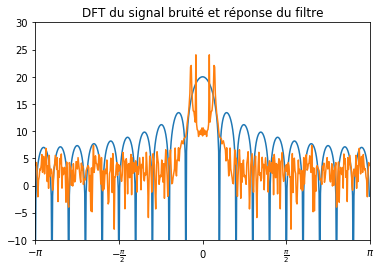

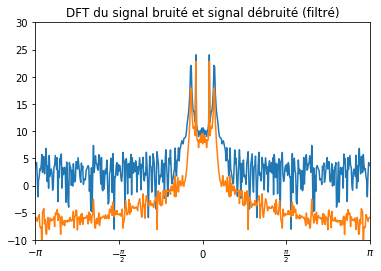

In [292]:
M=20                # pour reproduire les figures des transparents 177 e 178

#filtre MA
MA=np.zeros(N)
MA[:M]=1/M

#generation du signal
N=500
f1=0.020
f2=0.035
t=np.arange(N)
x=np.sin(2*np.pi*f1*t)+ np.sin(2*np.pi*f2*t)
y=x+np.random.normal(0,0.1,N)

#passe le domaine frequentiel 
yf=np.fft.fftshift(np.fft.fft(y))
y_ma=np.fft.fftshift(np.fft.fft(MA))

plt.title('DFT du signal bruité et réponse du filtre')
plt.plot(10*np.log10(abs(y_ma) +0.0001)+20)
plt.plot(10*np.log10(abs(yf)))
plt.axis([0,N,-10,30])                  #definition de la fenetre du graph
plt.xticks(np.arange(-0,N+1,N/4),[r'$-\pi$', r'$-\frac{\pi}{2}$','$0$',r'$\frac{\pi}{2}$',r'$\pi$'])
plt.show()

plt.title('DFT du signal bruité et signal débruité (filtré)')
g=(1/M)*np.ones(M)
gd=np.convolve(y, g, mode='same')   # The running mean is a case of the mathematical operation of convolution. 
                                    # For the running mean, you slide a window along the input 
                                    # and compute the mean of the window's contents. 
gf=np.fft.fftshift(np.fft.fft(gd))      #passe le domaine frequentiel 
plt.plot(10*np.log10(abs(yf)))
plt.plot(10*np.log10(abs(gf)))
plt.axis([0,N,-10,30])                  #definition de la fenetre du graph
plt.xticks(np.arange(-0,N+1,N/4),[r'$-\pi$', r'$-\frac{\pi}{2}$','$0$',r'$\frac{\pi}{2}$',r'$\pi$'])
plt.show()